In [36]:
from connattractor import analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
connfile = '../data_in/ex_connectome_partial_correlation.csv'
mtx = pd.read_csv(connfile).iloc[:,1:]

## Sweep beta with adjusted noise

In [39]:
simresults = dict()
hopfield_embeddings = dict()

i = 0
for beta, noise_coef in [(0.035, 0.35), (0.04, 0.35), (0.05, 0.5), (0.055, 0.7), (0.06, 0.8), (0.065, 0.9)]:
    simresults[beta] = analysis.simulate_activations(mtx.values, noise_coef=noise_coef, num_iter=100000, beta=beta)
    hopfield_embeddings[beta] = analysis.create_embeddings(simresults[beta], attractor_sample=1000)
    

100%|██████████| 1000/1000 [00:40<00:00, 24.63it/s]


/home/tspisak/src/connattractor/connattractor/analysis.py:237: UserWarning: The following kwargs were not used by contour: 'bins'
  ax.contour(theta, rad, pred.T, **default_regimes_contour_kwargs)


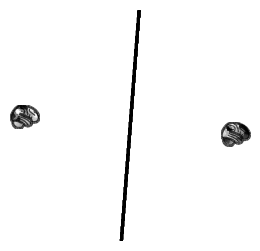

/home/tspisak/src/connattractor/connattractor/analysis.py:237: UserWarning: The following kwargs were not used by contour: 'bins'
  ax.contour(theta, rad, pred.T, **default_regimes_contour_kwargs)


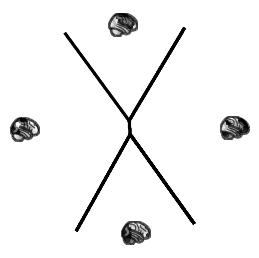

/home/tspisak/src/connattractor/connattractor/analysis.py:237: UserWarning: The following kwargs were not used by contour: 'bins'
  ax.contour(theta, rad, pred.T, **default_regimes_contour_kwargs)


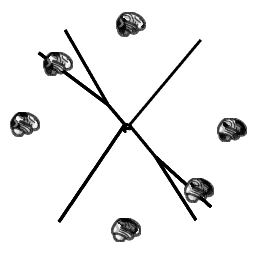

/home/tspisak/src/connattractor/connattractor/analysis.py:237: UserWarning: The following kwargs were not used by contour: 'bins'
  ax.contour(theta, rad, pred.T, **default_regimes_contour_kwargs)


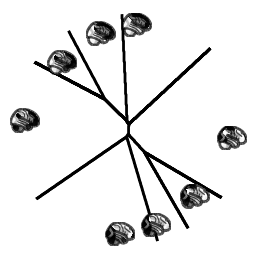

In [45]:

for beta, noise_coef in [(0.035, 0.35), (0.04, 0.35), (0.05, 0.5), (0.06, 0.8)]:
    
    fig, ax = plt.subplots(figsize=(3, 3), subplot_kw={'projection': 'polar'})
    hopfield_embeddings[beta].plot( ax= ax,
                        attractor_plot_type='glassbrain', attractor_kwargs=dict(cmap='binary'),
                        regimes_fill_kwargs=dict(alpha=0),
                        regimes_contour_kwargs=dict(alpha=1.0, bins=10, linewidths=2, colors='black')
                       )
    ax.set_yticks([])
    ax.grid(False)
    plt.savefig('../data_out/fig/attractors_with_beta_' + str(beta) + '.pdf')
    plt.show()

In [4]:
simres = analysis.simulate_activations(mtx.values, noise_coef=0.5, num_iter=1000, beta=0.04)
hopfield_embedding = analysis.create_embeddings(simres, attractor_sample=100)

100%|██████████| 100/100 [09:06<00:00,  5.46s/it]


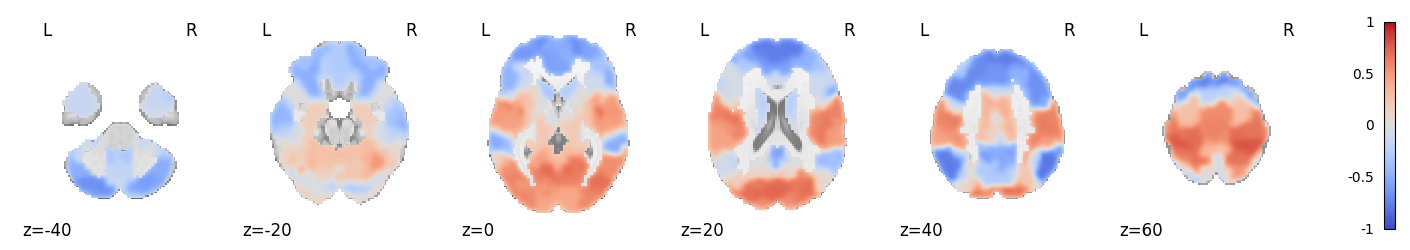

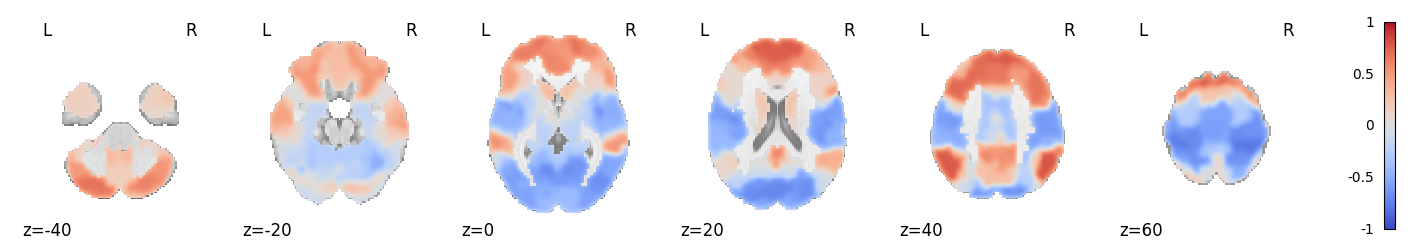

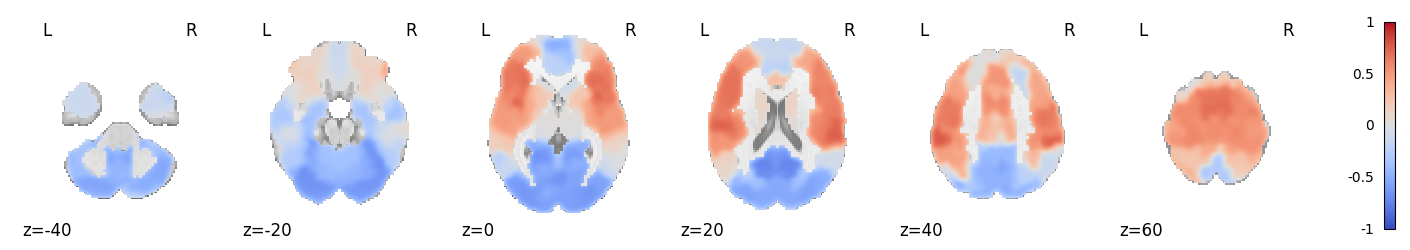

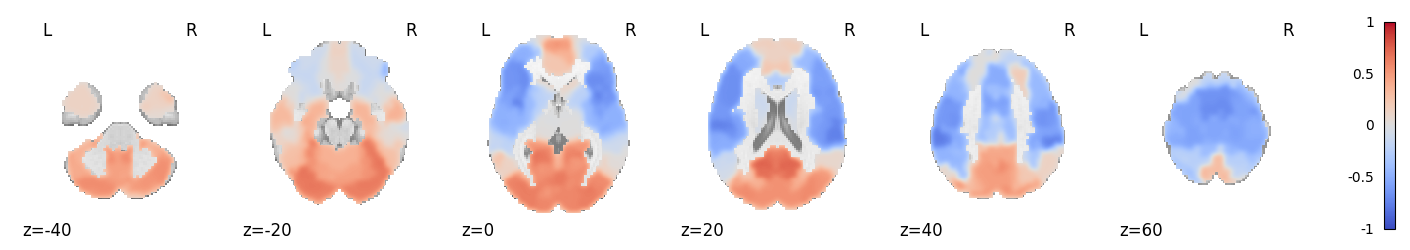

In [35]:
from nilearn import plotting, image
from nibabel import load, save, Nifti1Image
from connattractor import network
for k in hopfield_embedding.attractors.keys():
    img = network.State(hopfield_embedding.attractors[k]).to_Nifti1Image()
    img_smooth = image.smooth_img(img, fwhm=6).get_fdata()
    # load anothor image to mask
    mask = load('../data_in/brain_mask.nii.gz').get_fdata()
    # do masking 
    mask = mask * img_smooth
    #save the new file out 
    out = Nifti1Image(mask, header=img.header, affine=img.affine)
    plotting.plot_stat_map(
    out,
    display_mode="z",
    cut_coords=[-40, -20, 0, 20, 40, 60],
    #title="Attractor " + str(k),
    colorbar=True,
    cmap='coolwarm', vmax=1
    )
    plt.savefig('../data_out/fig/attractor-' + str(k) + '.pdf')